# Bite Size Bayes

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Estimating the difference between proportions

From [the Reddit statistics forum](https://www.reddit.com/r/statistics/comments/fsieqf/q_distribution_of_difference_of_correlated_coin/)

> You have two coins, and a sequence of flips from each. Your goal is to assess the distribution of the difference in coin flips. You could do Bayesian updating with a Beta prior to get a posterior for each coin, and assuming independence take the convolution. If you had the additional information that the average of the coin probabilities was p, how would you incorporate it? Is there any way to avoid the convolution and build a prior on the difference in coin flip probabilities directly? Thanks!

I suggested:

> Suppose the probability of heads for the two coins is p+x and p-x. If we know p, all we have to estimate is x.
>
>The likelihood function is the product of two binomials.
>
>I would use a grid method to estimate the posterior.

Here's how:

In [2]:
xs = np.arange(101) / 100
uniform = pd.Series(1, index=xs)
uniform /= uniform.sum()

We can use `binom.pmf` to compute the likelihood of the data for each possible value of $x$.

In [3]:
from scipy.stats import binom

def compute_likelihood(xs, p_avg, k, n):
    p_low = p_avg - xs
    p_high = p_avg + xs

    likelihood = (binom.pmf(k, n, p=p_low) + 
                  binom.pmf(k, n, p=p_high)) /2
    likelihood = np.nan_to_num(likelihood)
    
    return likelihood

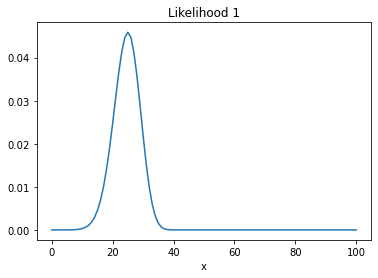

In [4]:
xs = uniform.index
p_avg = 0.5
k = 75
n = 100
likelihood1 = compute_likelihood(xs, p_avg, k, n)

plt.plot(likelihood1)
plt.xlabel('x')
plt.title('Likelihood 1');

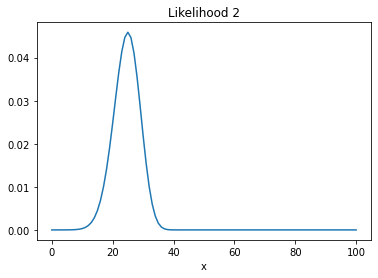

In [5]:
xs = uniform.index
p_avg = 0.5
k = 25
n = 100
likelihood2 = compute_likelihood(xs, p_avg, k, n)

plt.plot(likelihood2)
plt.xlabel('x')
plt.title('Likelihood 2');

Now we can do the Bayesian update in the usual way, multiplying the priors and likelihoods:

In [6]:
posterior = uniform * likelihood1 * likelihood2

Computing the total probability of the data:

In [7]:
total = posterior.sum()
total

0.00015958597615453273

And normalizing the posterior.

In [8]:
posterior /= total

Here's what it looks like.

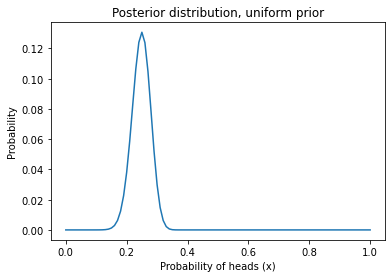

In [9]:
posterior.plot()

plt.xlabel('Probability of heads (x)')
plt.ylabel('Probability')
plt.title('Posterior distribution, uniform prior');

The posterior mean is pretty close to the value I used to construct the data, 0.25.

In [10]:
def pmf_mean(pmf):
    """Compute the mean of a PMF.
    
    pmf: Series representing a PMF
    
    return: float
    """
    return np.sum(pmf.index * pmf)

In [11]:
pmf_mean(posterior)

0.2475247524738673